In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


import warnings
warnings.filterwarnings("ignore")

In [3]:
X=pd.read_csv('cleaned_bank_data.csv',index_col=0)
y=X['y']
X=X.drop(['y'],axis=1)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [4]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

Random Forest tuning
I am tuning the following features and I will appy adaboost to the best tuned model

- 'max_depth'
- 'min_samples_leaf'
- 'n_estimators'
- 'max_features'
- 'min_samples_split'

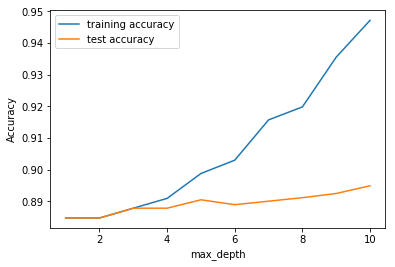

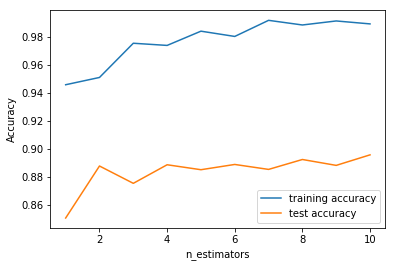

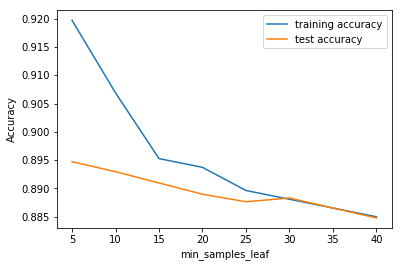

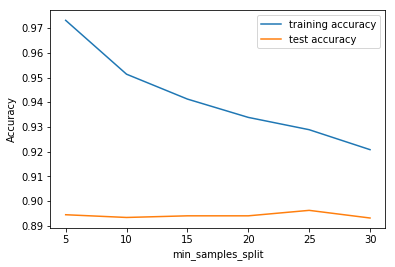

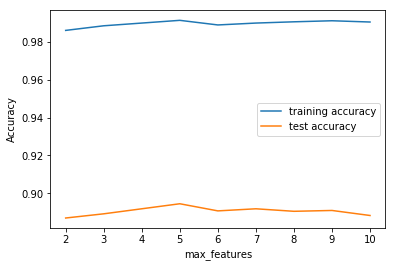

In [6]:
# parameters to build the model on
hyperparameter = ['max_depth','n_estimators','min_samples_leaf','min_samples_split','max_features']

range = [
    [1,2,3,4,5,6,7,8,9,10],
    [1,2,3,4,5,6,7,8,9,10],
    [5,10,15,20,25,30,40],
    [5,10,15,20,25,30],
    [2,3,5,6,7,8,9,10]
    ]

for var in zip(hyperparameter,range):
    
    parameters = {"{}".format(var[0]): var[1]}
    # instantiate the model
    rf = RandomForestClassifier()


    # fit tree on training data
    rfgrid = GridSearchCV(rf, parameters, 
                    cv=3, 
                   scoring="accuracy")
    rfgrid.fit(X, y)
    scores = rfgrid.cv_results_

    plt.figure()
    plt.plot(scores['param_'+var[0]], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores['param_'+var[0]], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(var[0])
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## Using the tuned parameters to find the best model

In [7]:
# Create the parameter grid based on the results of random search 

param_grid = {
    'max_depth': [0.01,0.1,1,2],
    'min_samples_leaf': [2,5,10,15,20,25,30,35,40,45],
    'min_samples_split': [5,10,20,25,30,35],
    'n_estimators': [4,5,6,8],
    'max_features': [4,5,6,7,8,9,10] 
}
# Create a based model
rf_tree = RandomForestClassifier()
# Instantiate the grid search model
rfgrid_search = GridSearchCV(estimator = rf_tree, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [8]:
# Fit the grid search to the data
rfgrid_search.fit(X, y)

Fitting 3 folds for each of 6720 candidates, totalling 20160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 2976 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 5776 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 9376 tasks      | elapsed:   36.6s
[Parallel(n_jobs=-1)]: Done 13776 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 18976 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 20160 out of 20160 | elapsed:  1.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [0.01, 0.1, 1, 2], 'min_samples_leaf': [2, 5, 10, 15, 20, 25, 30, 35, 40, 45], 'min_samples_split': [5, 10, 20, 25, 30, 35], 'n_estimators': [4, 5, 6, 8], 'max_features': [4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [9]:
# printing the optimal accuracy score and hyperparameters
print('The best RFC accuracy score is {0:.4f}'.format(rfgrid_search.best_score_),'and has the parameters\n',rfgrid_search.best_params_)

The best RFC accuracy score is 0.8912 and has the parameters
 {'max_depth': 2, 'max_features': 10, 'min_samples_leaf': 2, 'min_samples_split': 30, 'n_estimators': 6}


## Tuned RFC has an accuracy score of 0.8912.

# Applying the AdaBoostClassifier

In [10]:

# model with the best hyperparameters
rf_final = RandomForestClassifier(bootstrap=True,
                             max_depth=2,
                             min_samples_leaf=30, 
                             min_samples_split=5,
                             max_features=4,
                             n_estimators=5)

In [11]:
# adaboost with the tree as base estimator
from sklearn.ensemble import AdaBoostClassifier
estimators = np.arange(1,50,1)

ada_scores = []
for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator=rf_final, n_estimators = n_est)
    res = cross_val_score(ABC, X, y, cv=3)
   
    print("\nThe average accuracy score: {0:.4f}".format(np.mean(res)), n_est)


The average accuracy score: 0.8848 1

The average accuracy score: 0.8859 2

The average accuracy score: 0.8890 3

The average accuracy score: 0.8905 4

The average accuracy score: 0.8916 5

The average accuracy score: 0.8894 6

The average accuracy score: 0.8918 7

The average accuracy score: 0.8945 8

The average accuracy score: 0.8929 9

The average accuracy score: 0.8949 10

The average accuracy score: 0.8945 11

The average accuracy score: 0.8916 12

The average accuracy score: 0.8945 13

The average accuracy score: 0.8956 14

The average accuracy score: 0.8934 15

The average accuracy score: 0.8983 16

The average accuracy score: 0.8958 17

The average accuracy score: 0.8969 18

The average accuracy score: 0.8949 19

The average accuracy score: 0.8963 20

The average accuracy score: 0.8965 21

The average accuracy score: 0.8958 22

The average accuracy score: 0.8958 23

The average accuracy score: 0.8956 24

The average accuracy score: 0.8956 25

The average accuracy score: 0.897

# The average accuracy score: .8998, better improvement when tuning RFC with AdaBoost.

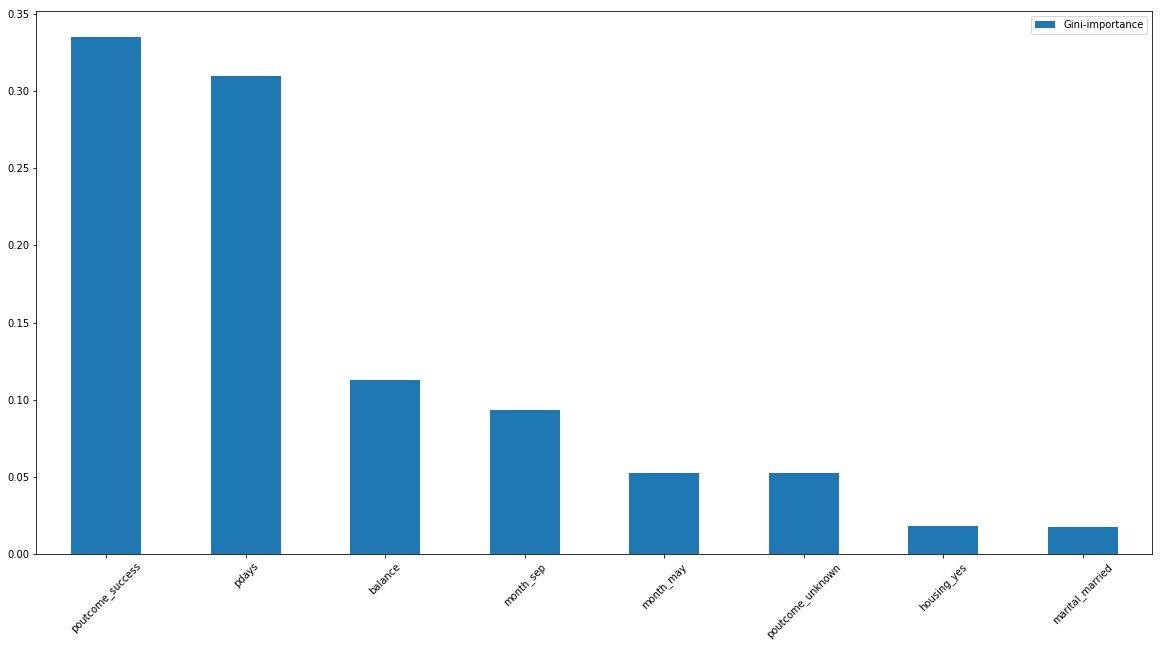

In [12]:
feats = {} # a dict to hold feature_name: feature_importance
rf_final.fit(X, y)
for feature, importance in zip(X.columns, rf_final.feature_importances_):
    feats[feature] = importance 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances.sort_values(by='Gini-importance', ascending =False).head(8).plot(kind='bar', rot=45, figsize=(20,10));


## Extreme Gradiant Boosting Tuning 
#I am tuning the following features to get the best score

- 'max_depth'
- 'learning_rate'
- 'n_estimators'
- 'subsample'
- 'colsample_bytree'
- 'colsample_bylevel'

In [6]:
from numpy import loadtxt
from numpy import sort
from xgboost import XGBClassifier ## here;s the only i'm taking about -- go to anaconda prompt and type pip install xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import GridSearchCV ## same as one we did for Decision trees and RF
from sklearn.model_selection import StratifiedKFold ## k fold cross validation.
from sklearn.preprocessing import LabelEncoder ##same as before.
import matplotlib.pyplot as pyplot

In [7]:
X=pd.read_csv('cleaned_bank_data.csv',index_col=0)
y=X['y']
X=X.drop(['y'],axis=1)
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Tuning XGBoost

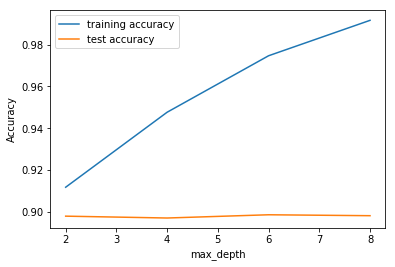

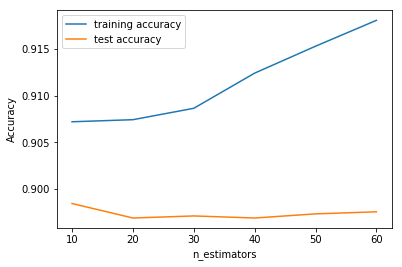

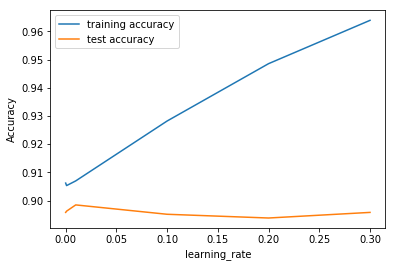

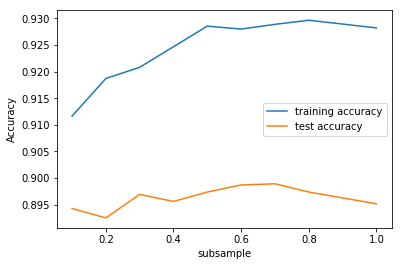

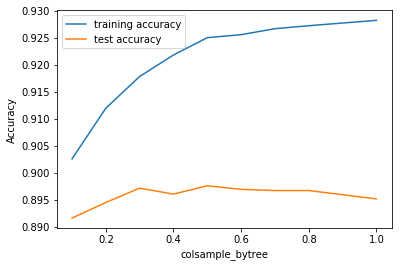

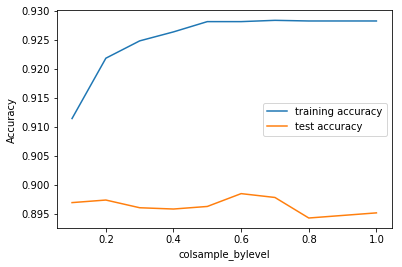

In [8]:
# parameters to build the model on
hyperparameter=['max_depth','n_estimators','learning_rate','subsample','colsample_bytree','colsample_bylevel']

range  =[ 
         [2, 4, 6, 8],
         [10, 20, 30, 40, 50, 60],
         [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
         [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0],
]
for var in zip(hyperparameter,range):
    
    parameters = {"{}".format(var[0]): var[1]}
    # instantiate the model
    dtree = XGBClassifier()

    # fit tree on training data
    tree = GridSearchCV(dtree, parameters, 
                        cv=3, 
                       scoring="accuracy")### you can change scoring functions right here.
    tree.fit(X, y)
    scores = tree.cv_results_

    plt.figure()
    plt.plot(scores['param_'+var[0]], 
             scores["mean_train_score"], 
             label="training accuracy")
    plt.plot(scores['param_'+var[0]], 
             scores["mean_test_score"], 
             label="test accuracy")
    plt.xlabel(var[0])
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

In [9]:
param_grid = {    
 'max_depth':[2,3,4],
 'n_estimators':[25,30,35,40,50],
 'learning_rate':[0.01,0.09,0.1,0.2,0.3],
 'subsample':[0.3,0.6,0.9],
 'colsample_bytree':[0.3,0.5],
 'colsample_bylevel':[0.6,0.7],}
# Create a based model
xgb = XGBClassifier()
# Instantiate the grid search model
xgb_grid = GridSearchCV(estimator = xgb, param_grid = param_grid, 
                          cv = 2, n_jobs = -1,verbose = 1)

In [10]:
# Fit the grid search to the data
xgb_grid.fit(X, y)

Fitting 2 folds for each of 900 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   38.6s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:   55.7s finished


GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [2, 3, 4], 'n_estimators': [25, 30, 35, 40, 50], 'learning_rate': [0.01, 0.09, 0.1, 0.2, 0.3], 'subsample': [0.3, 0.6, 0.9], 'colsample_bytree': [0.3, 0.5], 'colsample_bylevel': [0.6, 0.7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [11]:
# printing the optimal accuracy score and hyperparameters
print('The best XGB accuracy score is {0:.4f}'.format(xgb_grid.best_score_),'with parameters\n',xgb_grid.best_params_)

The best XGB accuracy score is 0.9009 with parameters
 {'colsample_bylevel': 0.7, 'colsample_bytree': 0.5, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 40, 'subsample': 0.6}


In [12]:
xgb_param_grid = {    
 'max_depth':[2],
 'n_estimators':[30],
 'learning_rate':[0.3],
 'subsample':[0.3],
 'colsample_bytree':[0.15],
 'colsample_bylevel':[0.0001],}
xgb_final = XGBClassifier()

xgb_grid_f = GridSearchCV(estimator = xgb_final, param_grid = xgb_param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
xgb_grid_f.fit(X, y)
print('We can get accuracy of {0:.4f}'.format(xgb_grid_f.best_score_),'with parameters\n',xgb_grid_f.best_params_)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


We can get accuracy of 0.8856 with parameters
 {'colsample_bylevel': 0.0001, 'colsample_bytree': 0.15, 'learning_rate': 0.3, 'max_depth': 2, 'n_estimators': 30, 'subsample': 0.3}


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    2.3s finished


### The accuracy score for Extreme Gradient Boost: 0.8856 